In [2]:
!pip install ijson

     |████████████████████████████████| 133kB 17.6MB/s 


In [177]:
import numpy as np
import pandas as pd
import ijson
from pandas.io.json import json_normalize

import seaborn as sns
from statistics import *
from statistics import stdev
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')


print('The shape of our features is:', df.shape)
df=df.replace(np.nan,0)

The shape of our features is: (3857, 7)


In [178]:
 # read in data
import pandas as pd
df = pd.read_json("test.jsonl",
                        lines=True,
                        orient='columns')
print(df.shape)
df[:4]

(3857, 21)


,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,Chrome,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z
1,356.6.121.291,-,-,GET,200,43,https://www.ecodibergamo.it/,224.80.19.283,"{'browser': {'family': 'Firefox', 'version': '70.0', 'major_version': 70}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:02.000000000Z,Firefox,pc,Windows 10,False,"{'stm': '1573171202942', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '0', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '1', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1680x1050', 'cd': '24', 'cookie': '1', 'eid': '52273f46-75ac-45d6-ad2b-26e8769ed3bf', 'dtm': '1573171202940', 'vp': '1680x908', 'ds': '1663x6737', 'vid': '1', 'sid': 'f35632aa-982f-4342-a86f-736d56b20797', 'duid': 'e7067c56-383b-4559-840f-70c193d3adf8', 'fp': '3175553694'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'MjM2NzkxNjI4MTB0d2l6MWk1MXA1Mng4cXVvMm9ybHFjcXNtbGVya3VnNw==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:02Z
2,130.216.19.309,-,-,GET,200,43,https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/,373.198.78.13,"{'browser': {'family': 'Chrome', 'version': '77.0.3865.116', 'major_version': 77}, 'os': {'family': 'Android', 'version': '4.4.4', 'major_version': 4}, 'device': 'Generic Smartphone'}",2019-11-08T00:00:02.000000000Z,Chrome,smartphone,Android,False,"{'stm': '1573171290396', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/stories/bergamo-citta/bergamo-nellolimpo-della-guida-rossada-vittorio-al-top-new-entry-impronte_1327138_11/', 'page': 'Bergamo nell’Olimpo della Guida Rossa «Vittorio» al top, new entry «Impronte» - Bergamo città Bergamo', 'refr': 'android-app://com.google.android.googlequicksearchbox/https/www.google.com', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it', 'cs': 'UTF-8', 'res': '800x1280', 'cd': '24', 'cookie': '1', 'eid': 'fc855c89-daf3-4c54-b0bf-06d7f41df16d', 'dtm': '1573171290376', 'vp': '800x1191', 'ds': '800x6819', 'vid': '1', 'sid': '473338c8-c941-48e2-8483-ec46e06e2728', 'duid': 'b2937acc-a384-4909-90b8-b5b4ce061e52', 'fp': '1935601176'}",7c6c8781197c,3555294575be3f0cf6e0e2b50e5be1e5,"{'user': {'id': 'NDkyMTgwMzk1MDh2c29vdzNpOW1xd2l4aWx6YmhramY0Z3l5eDdoOGJsYQ==_test', 'pr

In [179]:
df.isnull().sum()

remote                  0  
host                    0  
user                    0  
method                  0  
code                    0  
size                    0  
referer                 0  
http_x_forwarded_for    0  
ua                      0  
created                 0  
agent_name              0  
agent_category          0  
agent_os                0  
referer_known           0  
uri                     0  
hostname                0  
uri_url_hash            0  
injected                262
enrich                  0  
event_tag               0  
time                    0  
dtype: int64

In [180]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df1=df.copy() 
df["agent_os_new"] = label_encoder.fit_transform(df["agent_os"]).astype('float64')
df["agent_category_new"] = label_encoder.fit_transform(df["agent_category"]).astype('float64')
df["referer_new"] = label_encoder.fit_transform(df["referer"]).astype('float64')

pd.set_option('display.max_colwidth', -1)

df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,remote,host,user,method,code,size,referer,http_x_forwarded_for,ua,created,agent_name,agent_category,agent_os,referer_known,uri,hostname,uri_url_hash,injected,enrich,event_tag,time,agent_os_new,agent_category_new,referer_new
0,62.308.59.153,-,-,GET,200,43,https://www.ecodibergamo.it/,155.380.27.200,"{'browser': {'family': 'Chrome', 'version': '78.0.3904.87', 'major_version': 78}, 'os': {'family': 'Windows', 'version': '10', 'major_version': 10}, 'device': 'Other'}",2019-11-08T00:00:00.000000000Z,Chrome,pc,Windows 10,False,"{'stm': '1573171199218', 'e': 'pv', 'url': 'https://www.ecodibergamo.it/', 'page': 'L'Eco di Bergamo - Notizie di Bergamo e provincia', 'refr': 'https://www.ecodibergamo.it/', 'tv': 'js-2.11.0', 'tna': 'cf', 'aid': 'SB-de77ae02-a351-11e7-879c-28cfe91d3e21', 'p': 'web', 'tz': 'Europe/Berlin', 'lang': 'it-IT', 'cs': 'UTF-8', 'f_pdf': '1', 'f_qt': '0', 'f_realp': '0', 'f_wma': '0', 'f_dir': '0', 'f_fla': '0', 'f_java': '0', 'f_gears': '0', 'f_ag': '0', 'res': '1280x720', 'cd': '24', 'cookie': '1', 'eid': 'fee489a9-c110-42b8-b997-ab50ddb1e912', 'dtm': '1573171199215', 'vp': '1280x616', 'ds': '1263x6725', 'vid': '2', 'sid': 'a3b7e1b0-6192-46ee-8f6b-e258fc2811ab', 'duid': '0c2841a0-ea61-445e-973e-607ea1123333', 'fp': '4272995877'}",7c6c8781197c,7e452fb177e15e229756b1fff4a6f5bc,"{'user': {'id': 'NDc5MjkwNTAwMDBwMG95aGRmMDlzbXN2aW10eWdtM3p0ZjBrMHl0ZTZycg==_test', 'profile': {'type': 'anonymous'}}}",{},53248f1721ee,2019-11-08T00:00:00Z,4.0,2.0,1.0


In [158]:
len(df['time'].unique())

1946

In [181]:
print(df['size'].unique())
print(df['code'].unique())
#print(df['referer'].unique())
#print(df['ua'].unique())
print(df['agent_os'].unique())
print(df['agent_category'].unique())
df['month'] = pd.DatetimeIndex(df['time']).month
df['weekday'] = pd.DatetimeIndex(df['time']).weekday
df
print(df['month'].unique())

print(df['weekday'].unique())




[43]
[200]
['Windows 10' 'Android' 'Windows 7' 'iPhone' 'Mac OSX' 'iPad' 'Linux'
 'Windows XP' 'Windows Phone OS' 'Windows 8.1' 'UNKNOWN' 'Windows 8']
['pc' 'smartphone' 'crawler' 'UNKNOWN']
[11]
[4]


In [182]:
Counts = df.agent_category.value_counts()
print("-------Frequency counts for Department column-------\n",Counts)
print(type(Counts))

Counts = df.agent_os.value_counts()
print("-------Frequency counts for Department column-------\n",Counts)
print(type(Counts))

-------Frequency counts for Department column-------
 smartphone    2515
pc            1174
crawler       160 
UNKNOWN       8   
Name: agent_category, dtype: int64
<class 'pandas.core.series.Series'>
-------Frequency counts for Department column-------
 Android             1798
Windows 10          540 
iPhone              529 
Windows 7           329 
Mac OSX             226 
iPad                175 
UNKNOWN             168 
Windows 8.1         44  
Linux               19  
Windows Phone OS    13  
Windows XP          10  
Windows 8           6   
Name: agent_os, dtype: int64
<class 'pandas.core.series.Series'>


In [183]:
my_string="https://www.ecodibergamo.it/stories/Cronaca/"
print(my_string.split("https://www.ecodibergamo.it/",1)[1] )

stories/Cronaca/


In [184]:
def replace_urls(url):
    if url == 'https://www.ecodibergamo.it/':
        url = 'website'
    else:
        url = '/'.join(re.sub('https://www.ecodibergamo.it/', '', url).split('/')[:2])
    return url

In [185]:
import re
df['URL'] = [replace_urls(i) for i in df['referer']]

In [186]:
df= df[["agent_os","agent_category","URL","agent_os_new","agent_category_new","referer_new"]]

In [187]:
print (len(df['URL'].unique()))
print (len(df['agent_os'].unique()))
print ((len(df['agent_category'].unique())))

72
12
4


In [188]:
X = df [["agent_os_new","agent_category_new","referer_new"]]

y = df['referer_new']
y
cols = X.columns

In [189]:
X[:4]

,agent_os_new,agent_category_new,referer_new
0,4.0,2.0,1.0
1,4.0,2.0,1.0
2,0.0,3.0,269.0
3,5.0,2.0,245.0


In [190]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])
X[:4]

,agent_os_new,agent_category_new,referer_new
0,0.363636,0.666667,0.002114
1,0.363636,0.666667,0.002114
2,0.000000,1.000000,0.568710
3,0.454545,0.666667,0.517970


In [191]:
#K-Means model with n clusters 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans = kmeans.fit(X)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [192]:
kmeans.cluster_centers_

array([[-4.77395901e-15,  1.00000000e+00,  2.49204272e-02],
       [ 9.68379447e-01,  9.97101449e-01,  6.70986917e-01],
       [ 4.85167464e-02,  9.34035088e-01,  6.51587849e-01],
       [ 3.54160247e-01,  6.27966102e-01,  3.57490952e-02],
       [ 9.70011806e-01,  9.91341991e-01,  1.59743005e-02]])

In [193]:
kmeans.inertia_

126.97318489385522

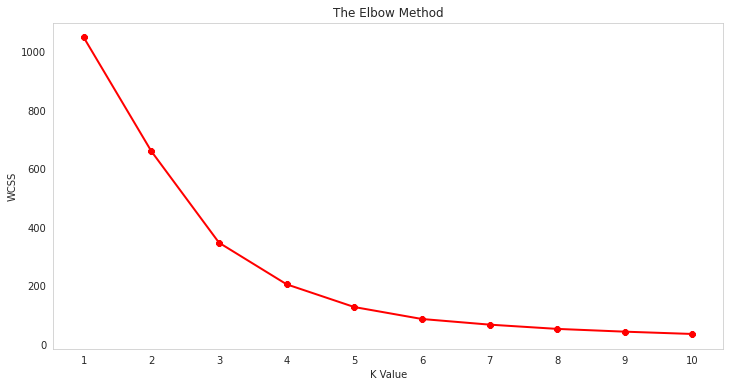

In [194]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    k_means = KMeans(n_clusters=k, init="k-means++")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.title('The Elbow Method')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [195]:
labels = kmeans.labels_
labels


array([3, 3, 2, ..., 4, 4, 3], dtype=int32)

The optimal K value is found to be 5 using the elbow method.


In [196]:
labels = kmeans.labels_
df['cluster_num'] = labels
df.head()



,agent_os,agent_category,URL,agent_os_new,agent_category_new,referer_new,cluster_num
0,Windows 10,pc,website,4.0,2.0,1.0,3
1,Windows 10,pc,website,4.0,2.0,1.0,3
2,Android,smartphone,stories/bergamo-citta,0.0,3.0,269.0,2
3,Windows 7,pc,stories/bassa-bergamasca,5.0,2.0,245.0,3
4,Android,smartphone,stories/bergamo-citta,0.0,3.0,301.0,2


In [197]:
df_ = df[df['agent_os']=='iPhone']
df_

,agent_os,agent_category,URL,agent_os_new,agent_category_new,referer_new,cluster_num
23,iPhone,smartphone,website,11.0,3.0,1.0,4
46,iPhone,smartphone,stories/Isola,11.0,3.0,193.0,1
63,iPhone,smartphone,website,11.0,3.0,1.0,4
64,iPhone,smartphone,website,11.0,3.0,1.0,4
73,iPhone,smartphone,stories/bergamo-citta,11.0,3.0,344.0,1
...,...,...,...,...,...,...,...
3824,iPhone,smartphone,website,11.0,3.0,1.0,4
3825,iPhone,smartphone,website,11.0,3.0,1.0,4
3847,iPhone,smartphone,stories/bergamo-citta,11.0,3.0,260.0,1
3853,iPhone,smartphone,stories/bergamo-citta,11.0,3.0,276.0,1


In [204]:
df.groupby('cluster_num').mean()

,agent_os_new,agent_category_new,referer_new
cluster_num,,,
0,0.000000,3.000000,11.787362
1,10.652174,2.991304,317.376812
2,0.533684,2.802105,308.201053
3,3.895763,1.883898,16.909322
4,10.670130,2.974026,7.555844


In [205]:
df['agent_os'].apply(str)
df['agent_category'].apply(str)
df['URL'].apply(str)

0       website                 
1       website                 
2       stories/bergamo-citta   
3       stories/bassa-bergamasca
4       stories/bergamo-citta   
                ...             
3852    stories/bergamo-citta   
3853    stories/bergamo-citta   
3854    stories/Cronaca         
3855    website                 
3856    website                 
Name: URL, Length: 3857, dtype: object

count    3857.000000
mean     3.341198   
std      4.002236   
min      0.000000   
25%      0.000000   
50%      2.000000   
75%      5.000000   
max      11.000000  
Name: agent_os_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


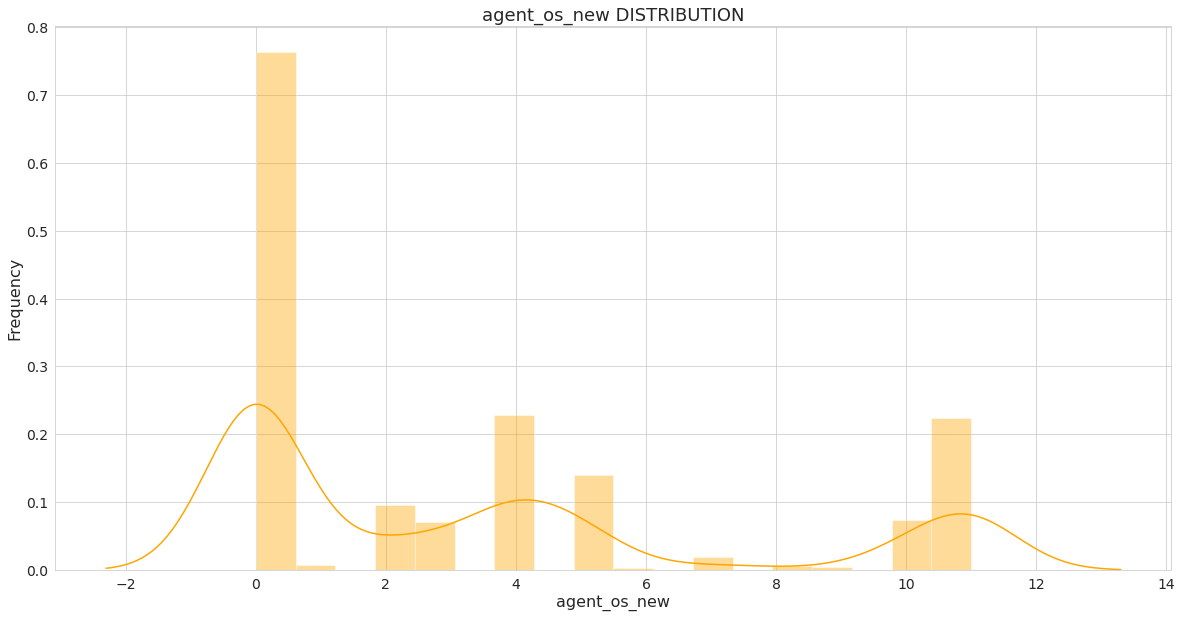

In [206]:
print(cl(df['agent_os_new'].describe(), attrs = ['bold']))

sb.distplot(df['agent_os_new'], 
            color = 'orange')
plt.title('agent_os_new DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('agent_os_new', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('agent_os_new_distribution.png')
plt.show()

count    3857.000000
mean     2.606430   
std      0.578075   
min      0.000000   
25%      2.000000   
50%      3.000000   
75%      3.000000   
max      3.000000   
Name: agent_category_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


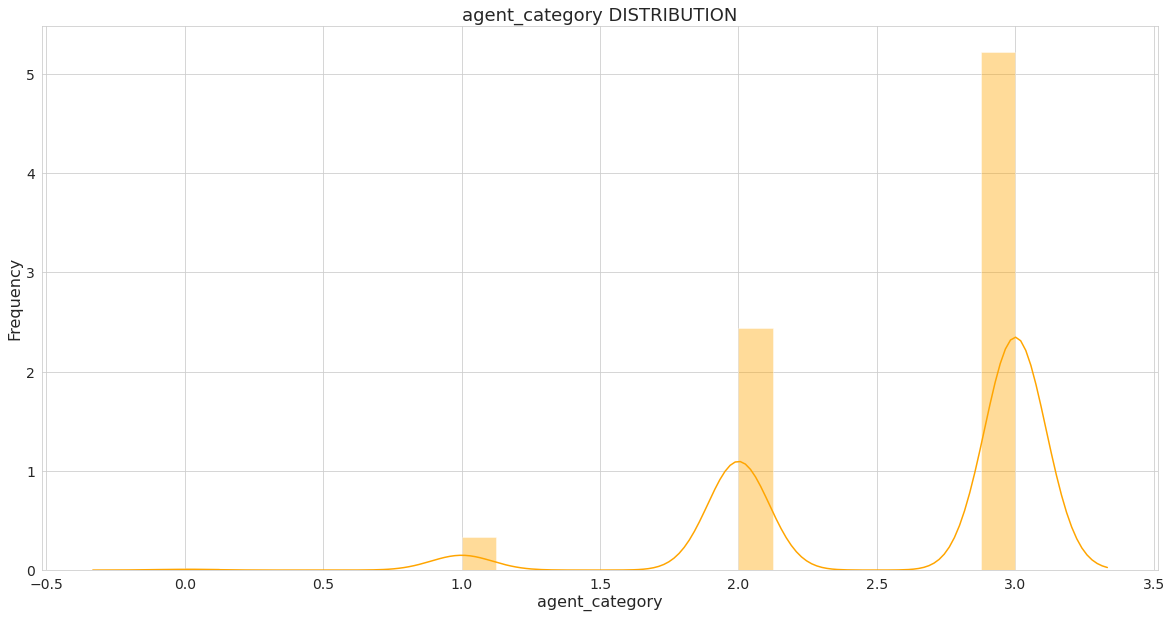

In [207]:
print(cl(df['agent_category_new'].describe(), attrs = ['bold']))

sb.distplot(df['agent_category_new'], 
            color = 'orange')
plt.title('agent_category DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('agent_category', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('agent_category_distribution.png')
plt.show()

count    3857.000000
mean     113.274566 
std      151.256134 
min      0.000000   
25%      1.000000   
50%      1.000000   
75%      245.000000 
max      473.000000 
Name: referer_new, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


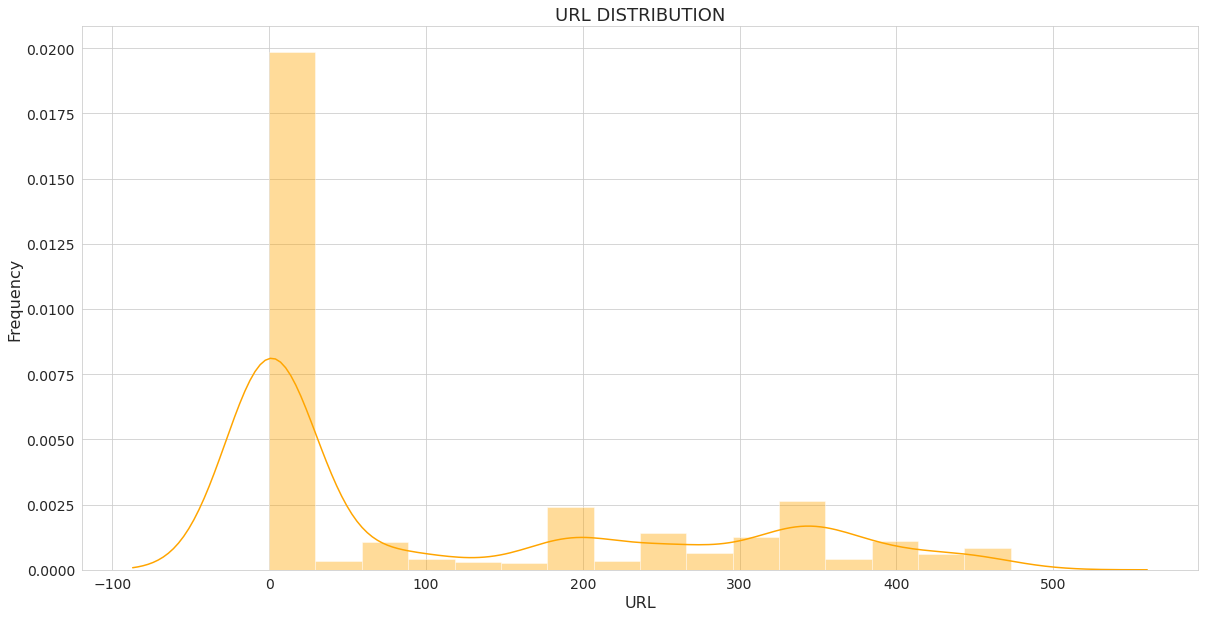

In [208]:
print(cl(df['referer_new'].describe(), attrs = ['bold']))

sb.distplot(df['referer_new'], 
            color = 'orange')
plt.title('URL DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('URL', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('URL_distribution.png')
plt.show()

In [253]:
df[:20]


,agent_os,agent_category,URL,agent_os_new,agent_category_new,referer_new,cluster_num,label
0,Windows 10,pc,website,4.0,2.0,1.0,3,2
1,Windows 10,pc,website,4.0,2.0,1.0,3,2
2,Android,smartphone,stories/bergamo-citta,0.0,3.0,269.0,2,0
3,Windows 7,pc,stories/bassa-bergamasca,5.0,2.0,245.0,3,2
4,Android,smartphone,stories/bergamo-citta,0.0,3.0,301.0,2,0
5,Windows 7,pc,website,5.0,2.0,1.0,3,2
6,Android,smartphone,website,0.0,3.0,1.0,0,3
7,Windows 10,pc,stories/bassa-bergamasca,4.0,2.0,237.0,2,0
8,Android,smartphone,website,0.0,3.0,1.0,0,3
9,Android,smartphone,website,0.0,3.0,1.0,0,3


In [242]:
p= df.agent_os_new[df.label == 0]
p[:30]
df.agent_os[df.label == 0].apply(str)

2       Android   
4       Android   
7       Windows 10
11      Android   
12      Android   
         ...      
3837    Android   
3838    Android   
3839    Android   
3849    Android   
3852    Android   
Name: agent_os, Length: 950, dtype: object

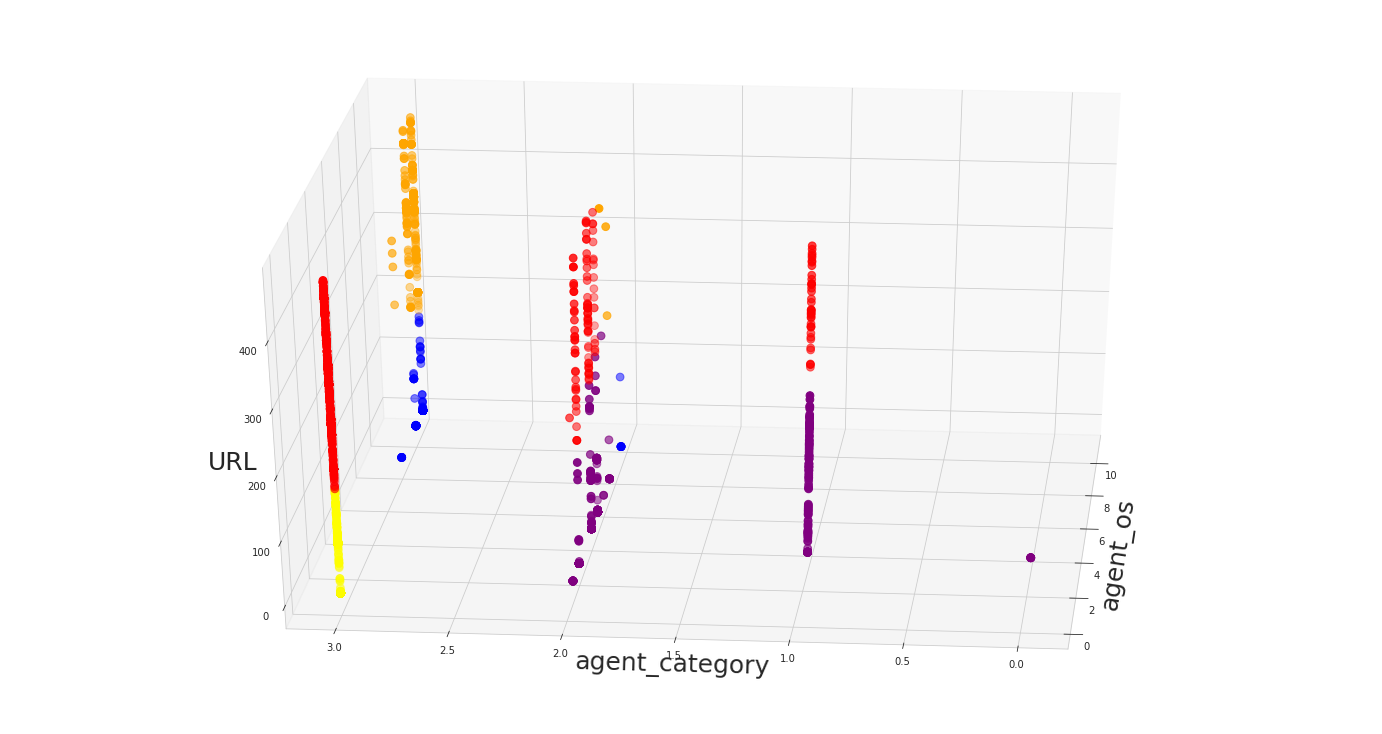

In [258]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(X)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

ax.scatter(df.agent_os_new[df.label == 0], df["agent_category_new"][df.label == 0], df["referer_new"][df.label == 0], c='blue', s=60, alpha = 0.5)
ax.scatter(df.agent_os_new[df.label == 1], df["agent_category_new"][df.label == 1], df["referer_new"][df.label == 1], c='red', s=60)
ax.scatter(df.agent_os_new[df.label == 2], df["agent_category_new"][df.label == 2], df["referer_new"][df.label == 2], c='yellow', s=60)
ax.scatter(df.agent_os_new[df.label == 3], df["agent_category_new"][df.label == 3], df["referer_new"][df.label == 3], c='orange', s=60)
ax.scatter(df.agent_os_new[df.label == 4], df["agent_category_new"][df.label == 4], df["referer_new"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)


plt.xlabel("agent_os", size = 25)
plt.ylabel("agent_category", size = 25)
ax.set_zlabel('URL', size = 25)
plt.show()

To get an impression of the clustering, we create a visualization with the method “tSNE”. t-Distributed Stochastic Neighbor Embedding (tSNE) is a technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional data sets.

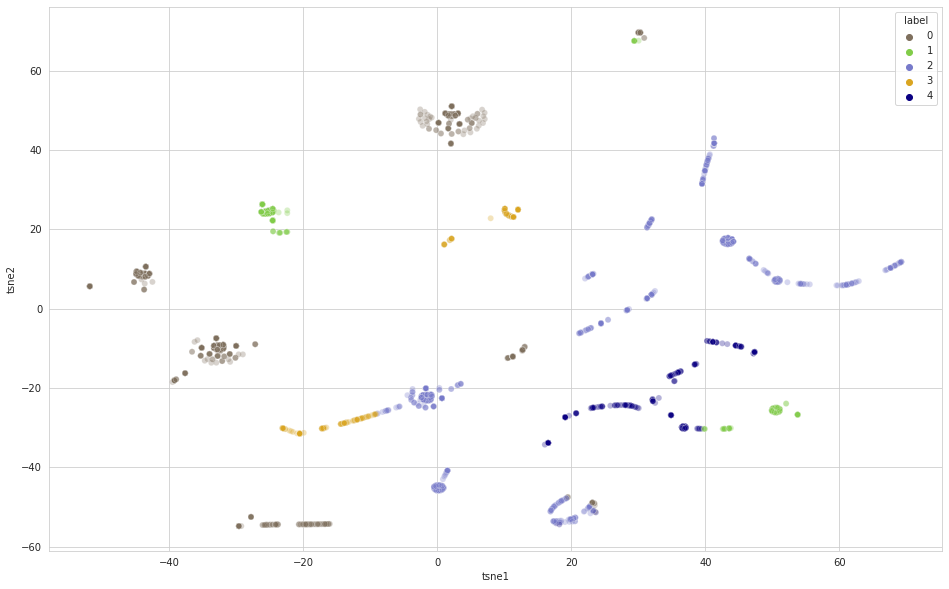

In [212]:
from sklearn.manifold import TSNE
import seaborn as sns
colors = ["#7e6f5d", "#81cc49","#777aca","#daa520","#0a0082","#4b0082","#66012e","#cd025c",
    "#adabe2","#dbe485","#ff035c","#ebe306","#66ff99","#323001","#127d69"]


X_embedded = TSNE(n_components=2).fit_transform(X)

df_subset = pd.DataFrame()
df_subset['tsne1'] = X_embedded[:,0]
df_subset['tsne2'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue=df.label,
    palette=sns.color_palette(colors[:5]),
    data=df_subset,
    legend="full",
    alpha=0.3
)